In [1]:
import pyodbc



In [2]:
pyodbc.dataSources()

{'dBASE Files': 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)',
 'Excel Files': 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'MS Access Database': 'Microsoft Access Driver (*.mdb, *.accdb)'}

In [3]:
driver = '{Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)}'
filepath = r'C:\Users\Leonardo Mateus\Documents\Deslizamientos1.1.mdb'
myDataSources = pyodbc.dataSources()
acces_driver = myDataSources['MS Access Database']
cnxn = pyodbc.connect(driver=acces_driver,dbq=filepath)
cnxn.setencoding('utf-8')

crsr = cnxn.cursor()
tables_list = list(crsr.tables())
table_name = 'Deslizamientos'
Id_sismo = '1644-01-16'

query_sismos = f"SELECT Id_sismo FROM Sismos '  "
crsr.execute(query_sismos)

sismos = crsr.fetchall()

Id_sismo = '1967-02-09'
#Id_sismo = sismos[0]

#query_sentidos = f"SELECT * FROM {table_name} WHERE Id_sismo = '{Id_sismo}'  "
query_deslizamientos = f"SELECT * FROM {table_name} WHERE Efectos_naturaleza = 'Si'  "
crsr.execute(query_deslizamientos)

row_sentidos = crsr.fetchall()

print(len(row_sentidos))
print(row_sentidos)
#print(row_sentidos[0][9])

cnxn.close()

177
[('1644-03-16', 'Si', 'Soacha', ' El sismo derribó gran parte de un cerro y árboles abajo del Salto del Tequendama, que obstruyeron el río Bogotá durante varios días', None, 4.5798, -74.2984, 'ESTUDIO MACROSÍSMICO DEL SISMO DEL 16 DE MARZO DE 1644 EN TUNJUELO (Cundinamarca)', 'Ana Milena Sarabia Hernán G. Cifuentes'), ('1644-03-16', 'Si', 'Chipaque', 'Los cerros que limitan a Chipaque con Bogotá resultaron sumamente agrietados, transversal y perpendicularmente. Desprendimientos de tierra bloquearon la Quebrada Honda durante varios días.', None, 4.44, -74.04, 'ESTUDIO MACROSÍSMICO DEL SISMO DE 16 DE MARZO DE 1644 EN TUNJUELO (Cundinamarca)', 'Ana Milena Sarabia Hernán G. Cifuentes'), ('1646-04-03', 'Si', 'Furatena', 'Cayó la cima del Cerro Furatena y taponó la corriente del río mas caudaloso de la Provincia, el Carare, hoy río Minero..Brotaron arroyos donde no existian, tan gruesos como el cuerpo de un buey, y en otras partes las fuentes desaparecieron totalmente', None, 5.53, -74.1

In [4]:
import pandas as pd


driver = '{Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)}'
filepath = r'C:\Users\Leonardo Mateus\Documents\Deslizamientos1.1.mdb'
myDataSources = pyodbc.dataSources()
acces_driver = myDataSources['MS Access Database']
cnxn = pyodbc.connect(driver=acces_driver,dbq=filepath)
cnxn.setencoding('utf-8')

crsr = cnxn.cursor()
table_name = 'Deslizamientos'

'''SELECT nombreColumna(s)
FROM tabla1
INNER JOIN tabla2
ON tabla1.nombreColumna=table2.nombreColumna;'''

Id_sismo = '1967-02-09'
#Id_sismo = sismos[0]

#query_sentidos = f"SELECT * FROM {table_name} WHERE Id_sismo = '{Id_sismo}'  "
query_deslizamientos = f"SELECT *\
                         FROM Deslizamientos \
                         INNER JOIN \
                         Sismos ON Sismos.Id_sismo=Deslizamientos.Id_sismo"
crsr.execute(query_deslizamientos)

row_deslizamientos = crsr.fetchall()

#print(len(row_deslizamientos))

numero_deslizamientos = len(row_deslizamientos)
sql_query = pd.read_sql_query(query_deslizamientos,cnxn)

sql_query = sql_query[sql_query['Efectos_naturaleza'] == "Si"]

#print(sql_query)
cnxn.close()

[]

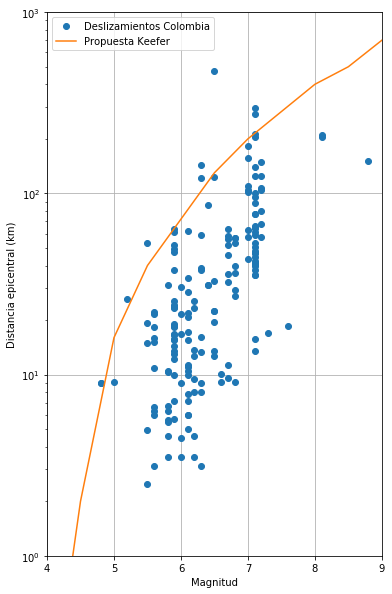

In [6]:
import matplotlib.pyplot as plt

dist_epi = ((sql_query["Latitud"]-sql_query["Lat_deslizamiento"])**2 + (sql_query["Longitud"]-sql_query["Long_deslizamiento"])**2)**0.5
magnitud = sql_query["Magnitud"]

#print(dist_epi>10)

dist_epi = dist_epi *111

M_keefer = [4,4.5,5,5.5,6.5,7,8,8.5,9]
dist_keefer = [0.1,2,16,40,130,200,400,500,700]

plt.figure(figsize=(6,10))
plt.plot(magnitud,dist_epi,"o",label="Deslizamientos Colombia")
plt.plot(M_keefer,dist_keefer,label="Propuesta Keefer")
plt.xlim(4,9)
plt.ylim(1,10**3)
plt.legend()
plt.yscale('log')
plt.xlabel("Magnitud")
plt.ylabel("Distancia epicentral (km)")
plt.grid()
plt.plot()

(4, 10)

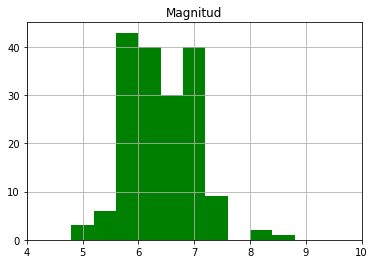

In [9]:
import matplotlib.pyplot as plt
#print(dist_epi[dist_epi>300])
#sql_query.iloc[105]
sql_query.hist(column='Magnitud',color="green")
plt.xlim(4,10)




[]

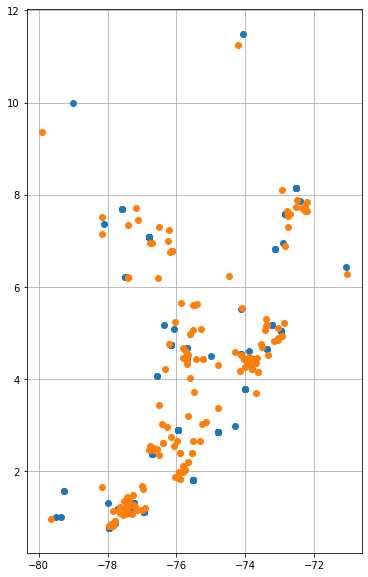

In [11]:
plt.figure(figsize=(6,10))
plt.plot(sql_query["Longitud"],sql_query["Latitud"],"o")
plt.plot(sql_query["Long_deslizamiento"],sql_query["Lat_deslizamiento"],"o")
#plt.xlim(-80,-70)
plt.grid()
plt.plot()

C:\Users\Leonardo Mateus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


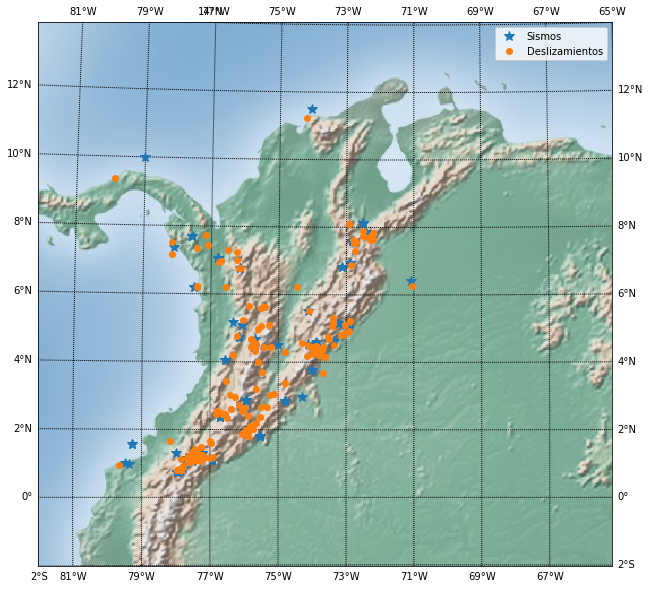

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
map = Basemap(llcrnrlat=-2,urcrnrlat=14,\
            llcrnrlon=-82,urcrnrlon=-65, epsg=3117)
#http://server.arcgisonline.com/arcgis/rest/services
#EPSG Number of America is 4269
map.shadedrelief()

# meridians on bottom and left
parallels = np.arange(-2,15,2)
# labels = [left,right,top,bottom]
map.drawparallels(parallels,labels=[True,True,True,True])
meridians = np.arange(-85,-60,2)
map.drawmeridians(meridians,labels=[True,True,True,True])



#map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)
x, y = map(sql_query["Longitud"].values,sql_query["Latitud"].values)
x1,y1 = map(sql_query["Long_deslizamiento"].values,sql_query["Lat_deslizamiento"].values)
plt.plot(x, y, "*", markersize = 10,label="Sismos")
plt.plot(x1,y1,"o",label="Deslizamientos")
plt.legend()
plt.show()


In [31]:
print(sql_query.columns.duplicated())

[False False False False False False False False False  True False False
 False False False False False False False False False]


In [130]:
#PGA_00 = estacion[estacion['Localizador'] == 00]
sql_query = sql_query.drop_duplicates(keep ='first')
sql_query = sql_query.loc[:,~sql_query.columns.duplicated()]
print(sql_query)

sql_query[sql_query['Id_sismo']=='1644-03-16']

       Id_sismo Efectos_naturaleza         Sitio  \
1    1644-03-16                 Si        Soacha   
2    1644-03-16                 Si      Chipaque   
3    1646-04-03                 Si      Furatena   
5    1743-10-18                 Si       Fomeque   
6    1743-10-18                 Si       Quetame   
..          ...                ...           ...   
198  1834-01-20                 Si      Sibundoy   
199  1936-01-09                 Si   La chorrera   
200  1936-07-17                 Si          None   
201  1970-09-26                 Si  Bahia Solano   
202  1983-03-31                 Si    Alto Cauca   

                             Descripcion_deslizamiento  Intensidad_sensor  \
1     El sismo derribó gran parte de un cerro y árb...                NaN   
2    Los cerros que limitan a Chipaque con Bogotá r...                NaN   
3    Cayó la cima del Cerro Furatena y taponó la co...                NaN   
5     En la vereda Guachavita se abrieron grandes g...             

,Id_sismo,Efectos_naturaleza,Sitio,Descripcion_deslizamiento,Intensidad_sensor,Lat_deslizamiento,Long_deslizamiento,Fuente,Autores,AÑO,MES,DIA,Latitud,Longitud,Hora_local,Magnitud,Intensidad_maxima,Profundidad,Numero_puntos,Area_epicentral
1,1644-03-16,Si,Soacha,El sismo derribó gran parte de un cerro y árb...,NaN,4.5798,-74.2984,ESTUDIO MACROSÍSMICO DEL SISMO DEL 16 DE MARZO...,Ana Milena Sarabia Hernán G. Cifuentes,1644,3,16,4.54,-74.13,1899-12-30 12:00:00,5.5,7,15.0,2,"Ubaque, Cundinamarca"
2,1644-03-16,Si,Chipaque,Los cerros que limitan a Chipaque con Bogotá r...,NaN,4.4400,-74.0400,ESTUDIO MACROSÍSMICO DEL SISMO DE 16 DE MARZO ...,Ana Milena Sarabia Hernán G. Cifuentes,1644,3,16,4.54,-74.13,1899-12-30 12:00:00,5.5,7,15.0,2,"Ubaque, Cundinamarca"


C:\Users\Leonardo Mateus\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


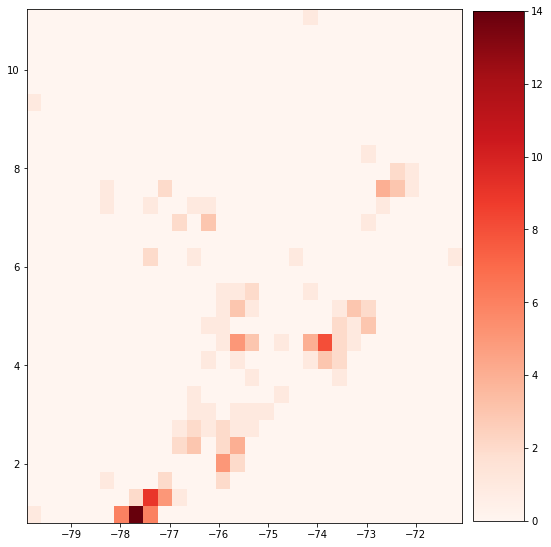

In [7]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Generate some test data

x = sql_query["Long_deslizamiento"].values
y = sql_query["Lat_deslizamiento"].values

#x = np.random.randn(8873)
#y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10,14))
map = Basemap(llcrnrlat=-2,urcrnrlat=14,\
            llcrnrlon=-82,urcrnrlon=-65, epsg=3117)
#http://server.arcgisonline.com/arcgis/rest/services
#EPSG Number of America is 4269
#

#plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',alpha=1,cmap='Reds')
#map.shadedrelief()
plt.colorbar( shrink=0.67, aspect=10, fraction=0.2,pad=0.02)
plt.show()